In [2]:
import pandas as pd
from cmdstanpy import CmdStanModel


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data

In [3]:
accidents_data = pd.read_csv('data/Airline_data.csv')

In [4]:
accidents_data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


## Load model

In [5]:
model = CmdStanModel(stan_file='stan_files/model.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
data = dict(M = len(accidents_data),
            y = accidents_data['Fatal accidents'].values,
            milage = accidents_data['Miles flown [100 mln miles]'].values)

print(f"Data: {data}")
fit = model.sample(data=data, chains=5)

INFO:cmdstanpy:CmdStan start processing


Data: {'M': 10, 'y': array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22]), 'milage': array([3863., 4300., 5027., 5481., 5814., 6033., 5877., 6223., 7433.,
       7107.])}


chain 1 |          | 00:00 Status





chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       



chain 5 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [7]:
fit.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9],y_sim[10]
0,495.044,0.485369,4.026230e-08,2.0,3.0,0.0,-489.728,2.56701,0.000158,15.0,21.0,37.0,27.0,23.0,34.0,37.0,32.0,49.0,33.0
1,493.216,0.788251,4.026230e-08,6.0,115.0,0.0,-492.109,2.56701,0.000158,23.0,26.0,38.0,29.0,32.0,41.0,41.0,25.0,62.0,35.0
2,494.175,1.000000,4.026230e-08,1.0,1.0,0.0,-493.264,2.56701,0.000158,23.0,20.0,38.0,31.0,33.0,39.0,30.0,36.0,42.0,39.0
3,494.031,0.988682,4.026230e-08,4.0,31.0,0.0,-493.683,2.56701,0.000158,39.0,34.0,25.0,29.0,32.0,30.0,41.0,34.0,44.0,49.0
4,494.145,1.000000,4.026230e-08,2.0,3.0,0.0,-493.959,2.56701,0.000158,31.0,34.0,32.0,28.0,27.0,33.0,40.0,28.0,35.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,493.179,1.000000,2.735050e-06,2.0,3.0,0.0,-490.368,2.56701,0.000158,24.0,28.0,19.0,39.0,25.0,28.0,31.0,48.0,44.0,35.0
4996,493.717,1.000000,2.735050e-06,1.0,1.0,0.0,-493.062,2.56701,0.000158,27.0,28.0,25.0,37.0,30.0,31.0,40.0,37.0,42.0,36.0
4997,493.676,0.991460,2.735050e-06,2.0,7.0,0.0,-492.916,2.56701,0.000158,19.0,28.0,36.0,28.0,36.0,29.0,19.0,37.0,40.0,42.0
4998,495.556,1.000000,2.735050e-06,2.0,3.0,0.0,-493.884,2.56701,0.000158,15.0,27.0,28.0,37.0,34.0,33.0,36.0,42.0,43.0,38.0


In [8]:
for i in range(1, 11):
    print(f"y_sim[{i}] mean: ", fit.draws_pd()[f'y_sim[{i}]'].mean())

y_sim[1] mean:  23.9352
y_sim[2] mean:  25.6916
y_sim[3] mean:  28.9344
y_sim[4] mean:  30.8448
y_sim[5] mean:  32.5624
y_sim[6] mean:  33.7944
y_sim[7] mean:  33.017
y_sim[8] mean:  34.7914
y_sim[9] mean:  41.9578
y_sim[10] mean:  39.9194


(array([  28.,  137.,  445., 1362., 1207., 1003.,  611.,  134.,   58.,
          15.]),
 array([ 9. , 12.3, 15.6, 18.9, 22.2, 25.5, 28.8, 32.1, 35.4, 38.7, 42. ]),
 <BarContainer object of 10 artists>)

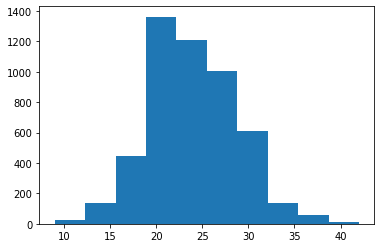

In [9]:
from matplotlib import pyplot as plt

plt.hist(fit.draws_pd()['y_sim[1]'])

The model doesn't predict the number of accidents accurately, since there is more to it than just a number of flown miles. There were probably improvements in security standards as time passes, which could explain poor model performance in the latest years.

## Load improved model

In [13]:
model_alpha = CmdStanModel(stan_file='stan_files/model_alpha.stan')

INFO:cmdstanpy:compiling stan file /root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha.stan to exe file /root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha
INFO:cmdstanpy:compiled model executable: /root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha.hpp /root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha.stan
Warning in '/root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/root/docs/data_analytics_2023_hszwast/lab_5/stan_files/model_alpha.stan', line 4, column 2: Declaration
    of arrays by placing brack

In [14]:
data = dict(M = len(accidents_data),
            y = accidents_data['Fatal accidents'].values,
            milage = accidents_data['Miles flown [100 mln miles]'].values)

print(f"Data: {data}")
fit = model.sample(data=data, chains=5)

INFO:cmdstanpy:CmdStan start processing


Data: {'M': 10, 'y': array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22]), 'milage': array([3863., 4300., 5027., 5481., 5814., 6033., 5877., 6223., 7433.,
       7107.])}


chain 1 |          | 00:00 Status











chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       
chain 5 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [15]:
fit.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9],y_sim[10]
0,495.102,0.973765,2.782210e-06,2.0,3.0,0.0,-494.983,2.56701,0.000158,17.0,27.0,35.0,30.0,40.0,20.0,32.0,34.0,38.0,52.0
1,495.442,0.929442,2.782210e-06,2.0,7.0,0.0,-494.469,2.56701,0.000158,13.0,22.0,27.0,21.0,26.0,31.0,42.0,34.0,40.0,41.0
2,495.088,0.876735,2.782210e-06,2.0,7.0,0.0,-494.416,2.56701,0.000158,23.0,22.0,31.0,21.0,27.0,26.0,31.0,37.0,48.0,45.0
3,494.114,0.858892,2.782210e-06,2.0,3.0,0.0,-493.400,2.56701,0.000158,23.0,30.0,25.0,32.0,31.0,27.0,31.0,29.0,39.0,32.0
4,494.319,1.000000,2.782210e-06,1.0,1.0,0.0,-493.970,2.56701,0.000158,17.0,24.0,40.0,30.0,28.0,19.0,27.0,45.0,49.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,494.831,0.694999,2.004840e-08,1.0,1.0,0.0,-493.932,2.56701,0.000158,25.0,30.0,33.0,27.0,29.0,38.0,21.0,43.0,38.0,53.0
4996,495.540,0.992765,2.004840e-08,5.0,47.0,0.0,-494.828,2.56701,0.000158,22.0,18.0,33.0,26.0,33.0,29.0,21.0,54.0,41.0,34.0
4997,493.180,0.851337,2.004840e-08,8.0,319.0,0.0,-491.925,2.56701,0.000158,33.0,27.0,32.0,33.0,27.0,26.0,34.0,39.0,47.0,40.0
4998,494.078,1.000000,2.004840e-08,1.0,3.0,0.0,-493.331,2.56701,0.000158,34.0,22.0,36.0,36.0,23.0,48.0,30.0,38.0,33.0,40.0


In [16]:
for i in range(1, 11):
    print(f"y_sim[{i}] mean: ", fit.draws_pd()[f'y_sim[{i}]'].mean())

y_sim[1] mean:  24.0132
y_sim[2] mean:  25.7202
y_sim[3] mean:  28.9332
y_sim[4] mean:  30.8848
y_sim[5] mean:  32.6922
y_sim[6] mean:  33.7886
y_sim[7] mean:  33.0
y_sim[8] mean:  34.9344
y_sim[9] mean:  42.2248
y_sim[10] mean:  40.112


(array([   7.,   99.,  534., 1314., 1160., 1244.,  474.,  134.,   29.,
           5.]),
 array([ 7. , 10.8, 14.6, 18.4, 22.2, 26. , 29.8, 33.6, 37.4, 41.2, 45. ]),
 <BarContainer object of 10 artists>)

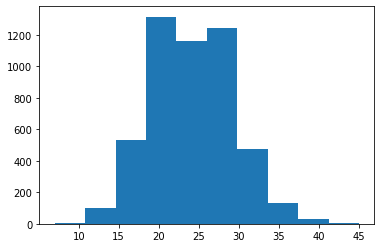

In [17]:
from matplotlib import pyplot as plt

plt.hist(fit.draws_pd()['y_sim[1]'])

The influence of flight length still seems to be overwhealming here